In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

SEED = 42
np.random.seed(SEED)

In [68]:
df = pd.read_csv (r'C:\Users\chee\Downloads\Walmart_Store_sales 2.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df)

      Store        Date  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0        14  23/12/2011             0        42.27       3.389  188.929975   
1         2  23/12/2011             0        46.66       3.112  218.999550   
2        27  24/12/2010             0        31.34       3.309  136.597273   
3         4  25/11/2011             1        47.96       3.225  129.836400   
4        10  25/11/2011             1        60.68       3.760  129.836400   
...     ...         ...           ...          ...         ...         ...   
6420     33   2/12/2011             0        59.12       3.701  129.845967   
6421     33  31/12/2010             1        52.91       3.148  127.087677   
6422     33  30/12/2011             1        51.60       3.428  130.071032   
6423     33  29/10/2010             0        71.34       3.130  126.436419   
6424     33   3/12/2010             0        52.82       3.041  126.731333   

      Unemployment  Weekly_Sales  
0            8.523    336906

In [69]:
df['Date'] = pd.to_datetime(df['Date'])
df['Holiday_Flag'] = df['Holiday_Flag'].astype('bool')

In [70]:
# limit to categorical data using df.select_dtypes()
df_cat = df.select_dtypes(include=['object'])

# limit to numerical data using df.select_dtypes()
df_num = df.select_dtypes(include=['number'])

In [71]:
storeDf = pd.get_dummies(df['Store'],prefix='store')
df = pd.concat([df,storeDf],axis=1)
holidayDf = pd.get_dummies(df['Holiday_Flag'],prefix='Ho')
df = pd.concat([df,holidayDf],axis=1)

In [72]:
x = df[['store_1','store_2','store_3','store_4','store_5','store_6','store_7','store_8','store_9','store_10','store_11',
       'store_12','store_13','store_14','store_15','store_16','store_17','store_18','store_19','store_20','store_21','store_22',
        'store_23','store_24','store_25','store_26','store_27','store_28','store_29','store_30','store_31','store_32','store_33',
       'store_34','store_35','store_36','store_37','store_38','store_39','store_40','store_41','store_42','store_43','store_44','store_45',
        'Ho_True','Ho_False','Temperature','CPI','Unemployment']]
y = df['Weekly_Sales']

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.1,
                                                  random_state=42)

In [75]:
rf = RandomForestRegressor(n_estimators=500,min_samples_split=10)
rf.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=10, n_estimators=500)

In [76]:
print("Regression model's training score = {:.6f}".format(rf.score(x_train, y_train)))
print("Regression model's test score     = {:.6f}".format(rf.score(x_test, y_test)))

Regression model's training score = 0.974208
Regression model's test score     = 0.941970


In [77]:
y_pred = rf.predict(x_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [78]:
compare_df

,Desired Output (Actuals),Predicted Output
324,2042581.71,1.892860e+06
5395,465408.72,4.666896e+05
6084,311906.70,3.533832e+05
6323,268929.03,2.910764e+05
381,2008344.92,2.041187e+06
...,...,...
41,2495630.51,2.152952e+06
1643,1409515.73,1.358194e+06
3464,911807.02,8.768444e+05
1608,1417616.81,1.393072e+06


In [79]:
own_pred = rf.predict(x_test.iloc[[0]])
print("My target value is   =", str(own_pred[0]))
print("My observed value is =", str(y_test.iloc[0]))

My target value is   = 1892859.9521907908
My observed value is = 2042581.71


In [63]:
print('Coefficient of determination: {:.6f}'.format(r2_score(y_test, y_pred)))

Coefficient of determination: 0.941970


Random Forest Regressor:

Accuracy: 94.21622447202265
Mean Absolute Error: 77288.04313993007
Mean Squared Error: 18844900401.672813
Root Mean Squared Error: 137276.72927948428


C:\Users\chee\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


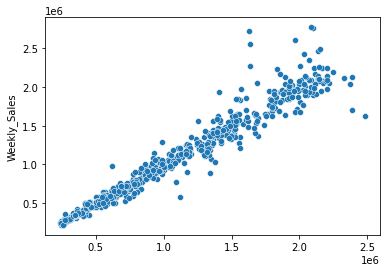

In [64]:
print('Random Forest Regressor:')
print()
rf = RandomForestRegressor(n_estimators=500,min_samples_split=10)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy:',rf.score(x_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

In [37]:
predicted_test = rf.predict(x_test)

fI = pd.DataFrame()
fI['Variable'] = list(x_train.columns)
fI['Importance'] = rf.feature_importances_
fI.sort_values(by='Importance',ascending=False)[0:57]

,Variable,Importance
19,store_20,0.081342
3,store_4,0.081210
13,store_14,0.076845
12,store_13,0.075081
1,store_2,0.071045
9,store_10,0.066310
48,CPI,0.062298
26,store_27,0.058160
10,store_11,0.037611
0,store_1,0.036523
